# Project: WeRateDogs


### Investigation Overview
In this investigation we aim to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. I want to find an important feature about the evaluated dogs and the behavior of WeRateDogs Twitter posts.

### Dataset Overview
The data was provided by udacity and relates to tweets made by twitter WeRateDogs. This data needs to be prepared and then went through a cleanup step that consisted of 9 fixes to improve quality and 3 corrections to improve data confusion. Finally the data was saved in a csv master file.

### Data Wrangling, Analyzing and Visualization

Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

## Table of Contents
- [Introduction](#intro)
-  [Data wrangling](#wrangling)
-- [Gathering data](#gathering) 
-- [Assessing data](#assessing)
-- - [Tidiness Issues](#)
-- [Cleaning data](#cleaning)
-  [Storing, analyzing, and visualizing](#analysis)
-  [Conclusion](#conclusion)
-  [References](#refs)


<a id='intro'></a>
## Introduction

In [1]:
# import the needed libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re
import plotly
import plotly.graph_objects as go
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud 
from IPython.display import Image
from IPython.core.display import HTML
%matplotlib inline

pd.options.display.max_rows=100
pd.options.display.max_columns=50
pd.options.display.max_colwidth =400

<a id='wrangling'></a>
## Data wrangling

<a id='gathering'></a>
### Gathering data

First, we will upload the CSV data, provided by udacity, which contains the enriched information from twitter WeRateDogs.

In [2]:
#load CSV file into DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1   

   rating_numerator  rating_denominator     name doggo floofer pupper puppo  
0                13                  10  Phineas  None    None   None  None  
1                13                  10    Tilly  None    None   None  None  
2                12                  10   Archie  None    None   None  None

Then a folder will be created and then the data will be downloaded, from analyzing images of the dogs, to the directory created. The link was provided in the project descriptions on the Udacity website itself.

In [3]:
#Make directory if it doesn't already exist
folderName = 'dog_imgs'
if not os.path.exists(folderName):
    os.makedirs(folderName)

In [4]:
#Access the link
dog_image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(dog_image_url)

In [5]:
#Save the data to the created directory.
with open(os.path.join(folderName, dog_image_url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
prediction = pd.read_csv(folderName+'/image-predictions.tsv', sep='\t')

In [7]:
prediction.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True

#### Twiter date
In this step we will redeem some data that is missing in the CSV files provided by Udacity. The process consists of using the Python module and getting the retweet count and 'favorite count' data in a JSON file, through the id of the tweets provided.

In [8]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

This step takes a considered time to obtain the data, so it was commented out to avoid reprocessing.

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
## Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

After the consultations are carried out through the API, we will continue with the reading of the generated JSON file and an evaluation of its structure.

In [11]:
with open('tweet_json.txt','r') as json_file:
    tweet_json = pd.read_json(json_file, lines= True, encoding = 'utf-8')
tweet_json.head(3)

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   

                                                                                                                                                            full_text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   

   truncated display_text_range  \
0      False            [0, 85]   
1      False           [0, 138]   
2      False           [0, 121]   

                                                                                                                                                                                                                                                                                                                                                                                                          entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twi...   
1  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://tw...   
2  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJB', 'display_url': 'pic.twitter.com/wUnZnhtVJB', 'expanded_url': 'https://tw...   

                                                                                                                                                                                                                                                                                                                                                                                                 extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': '...   
1  {'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': ...   
2  {'media': [{'id': 891815175371796480, 'id_str': '891815175371796480'

In [12]:
tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

We will now capture our 'tweet count' and 'favorite count' interest columns mentioned at the beginning of the session.

In [13]:
# select the columns of interest : 'id', 'favorite_count','retweet_count'
tweet_json = tweet_json.loc[:,['id','favorite_count','retweet_count']]
tweet_json.head(3)

id  favorite_count  retweet_count
0  892420643555336193           34915           7326
1  892177421306343426           30236           5470
2  891815181378084864           22760           3619

<a id='assessing'></a>
### Assessing date

With the data properly uploaded we will follow with the following configuration:
- twitter_archive: DataFrame with data from previously treated tweets
- prediction: Data referring to images that were processed in order to discover characteristics of dogs
- tweet_json: Data obtained through the twitter API that contains the fields 'favorite_count' and 'retweet_count' that were not contained in the data frame 'twitter_archive'.

We will start an analysis on each of the DataFrames and then we will look at the main features. For this we will create a function that will facilitate the analysis.

In [14]:
def checkDataFrame(df,dfname = ''):
    '''
    This function will summary all details from Dataset like: Shape, Info and columns describe
    '''
    
    print('Dataframe Summary\n')
    print(dfname)
    print('='*100)
    print('\tRows: {} Columns {}\n'.format(df.shape[0],df.shape[1]))
    print('-'*100)
    print(df.info(verbose=True))
    print('-'*100)
    print(df.describe())
    print('-'*100)
    for i in df.columns:
        vcount = df[i].value_counts()
        print(vcount)
        print('-'*100)
    print('Summary END')
    print('='*100)

In [15]:
checkDataFrame(twitter_archive,'twitter_archive')

Dataframe Summary

twitter_archive
	Rows: 2356 Columns 17

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   

We can analyze by the report of the dataframe 'twitter_archive' is that we need to join the columns of the dog types and change the variable to string, another point that we notice and that there are values equal to zero in the denominator which should be adjusted. The dates seem to be in inconsistent format and we can change the data type, in addition the ID field is as int which causes a change in the display of the data in scientific notation format, so we will change to String. The values in the Source column need to be converted from html format. To reduce data clutter we can remove unnecessary columns at first sight that are related to Retweets and are not part of the scope of the work. The other changes will be discussed in the following sessions. 

In [16]:
checkDataFrame(prediction,'prediction')

Dataframe Summary

prediction
	Rows: 2075 Columns 12

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB
None
----------------------------------------------------------------------------------------------------
           tw

The prediction data shows very consistent data, does not have null values, and appears to all have the proper data type, except for the tweet id field that will need to be converted to String at the time of merge. Not all columns seem to be useful, since we only need the records that had the final result of a dog, that is, all the columns pn_dog are true.

In [17]:
checkDataFrame(tweet_json,'tweet_json')

Dataframe Summary

tweet_json
	Rows: 2330 Columns 3

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2330 non-null   int64
 1   favorite_count  2330 non-null   int64
 2   retweet_count   2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB
None
----------------------------------------------------------------------------------------------------
                 id  favorite_count  retweet_count
count  2.330000e+03     2330.000000    2330.000000
mean   7.419372e+17     7293.417167    2579.853648
std    6.823171e+16    11327.304798    4362.751251
min    6.660209e+17        0.000000       1.000000
25%    6.782926e+17     1263.500000     525.000000
50%    7.183508e+17     3159.500000    1202.500000
75%    7.986712e+17    

The data obtained in the dataframe tweet_json seem to be clutter-free, except for the adjustment in the ID column that we will rename to tweet_id, aiming at the future merge in the tables.

In this first analysis it was possible to make a dictionary of the data used

### Data Dictionary

#### twitter_archive Dataframe
<pre>
#   Column                       Description
---  ------                       -------------------------
 0   tweet_id                     Unique value that identifies a Tweet.
 1   in_reply_to_status_id        Value identifies which was the source tweet which replied to.
 2   in_reply_to_user_id          Value that identifies which user was directed to a replica.
 3   timestamp                    Time and date of publication
 4   source                       Tweet creation device
 5   text                         Tweet text
 6   retweeted_status_id          An identifiable post made by someone else becomes a retweet and registered unique
 7   retweeted_status_user_id     Identification of the user who retweeted
 8   retweeted_status_timestamp   retweet time
 9   expanded_urls                URL that Tweet can be found
 10  rating_numerator             Grade assigned to the dog
 11  rating_denominator           Maximum score (in theory)
 12  name                         Rated dog name
 13  doggo                        He is a great pupper (the dogtionary reference)
 14  floofer                      Any dog, especially the furry ones
 15  pupper                       A small doggo, usually younger (the dogtionary reference)
 16  puppo                        This between a pupper and a doggo                     
</pre>               

#### prediction Dataframe
<pre>
#   Column    Description
---  ------    --------------
 0   tweet_id  Unique value that identifies a Tweet
 1   jpg_url   Dog image URL
 2   img_num   Image identifier number
 3   p1        First choice to predict a dog by the image.
 4   p1_conf   How confident the algorithm was in its first decision
 5   p1_dog    Decision whether or not it is a dog (True or False)
 6   p2        Second choice to predict a dog by the image.
 7   p2_conf   How confident the algorithm was in its second decision
 8   p2_dog    Decision whether or not it is a dog (True or False)
 9   p3        Third and last choice to predict a dog by the image.
 10  p3_conf   How confident the algorithm was in its last decision
 11  p3_dog    Decision whether or not it is a dog (True or False)
</pre>

#### Tweet_json Dataframe
<pre>
 #   Column          Description
---  ------           ------------
 0   id               Unique value that identifies a Tweet.
 1   favorite_count   Count of times the tweet was favored
 2   retweet_count    Count of times the tweet was retweeted
</pre>

<a id='Tidiness'></a>
## Tidiness Issues

According to the literature, the organized data must have the following characteristics:
- Each column is a variable.
- Every line is an observation.
- Each cell is a single value.

In addition, you want the data to be ordered in a way where fixed variables are placed first than random variables. In this session we will address some observations regarding the confusion of the data that were found in the preliminary analysis. The points that must be corrected for each dataset:

**twitter_archive**

- [NEED FIX] _The columns doggo,floofer, pupper and puppe; all can be represented by a single qualitative variable: dog stage._ 

**prediction**

- [NEED FIX] _We need a column with the dog breed that was established by the machine learning contained in the dataframe prediction._

**tweet_json**
- There is no Tidiness Issues

**All**
- [NEED FIX] _Data from different DataFrames can be combined to get a single table._

<a id='quality'></a>
## Quality Issues

According to the literature, the quality of the data may be associated with the following topics: schema, Data format, Data Context, Use case(s), and Output. These topics can help answer whether the data is incorrect according to a study at different levels. Metrics can generally be evaluated in different approaches:

Primary evaluation should analyze the following points: Data Type/Schema, Missing values, Unique Primary key, Outliers, Negative values, etc. Secondary assessment takes into account the consistency of Column Relationship and Contextual data range. Finally we can apply comparison with other data sources that have a high quality reliability.

For this study, 8 correction points will be addressed in order to gain a higher quality of the data.

**TO-DO**

- [FIX] _Fix the data type of Tweet_id._
- [FIX] _Timestamp column should be converted to dateTime_ 
- [FIX] _Delete the Retweet columns._
- [FIX] _Some values of name of dogs were extracted inconsistently._
- [FIX] _Adjust Source column values._
- [FIX] _Adjust rating system._
- [FIX] _Delete "extended url" column._
- [FIX] _Create the column of dog breeds_
- [FIX] _Make a normalize rate_


<a id='cleaning'></a>
### Cleaning data

We will start this session by adjusting the quality issues. Before we start, let's create a copy of the input data.

In [18]:
# Dataset Backup
twitter_archive2 = twitter_archive.copy()
prediction2 = prediction.copy()
tweet_json2 =  tweet_json.copy()

----------------------
### Quality Issue 1. Fix the data type of Tweet_id.
#### Define

Fix the data type of Tweet_id, this is necessary for this primary key to be used to merge the tables in the future.

    1. Rename column 'id' to 'tweet_id' at "tweet_json" dataframe.
    2. Adjust type of column 'tweet_id' to str() - ALL DATAFRAMES!

#### Code

In [19]:
tweet_json2.columns = ['tweet_id','favorite_count','retweet_count']

In [20]:
dfs = [twitter_archive2,prediction2,tweet_json2]
for i in dfs:
    i['tweet_id'] = i['tweet_id'].astype(str)

#### Test

In [21]:
#check rename
assert (tweet_json2.columns == ['tweet_id','favorite_count','retweet_count']).all()

In [22]:
#check type
for i in dfs:
    assert type(i['tweet_id'][0] == str)

----------------------
### Quality Issue 2. Timestamp column should be converted to dateTime.
#### Define

We will convert the timestamp data from INT64 to Datetime using Pandas. The formatting should match the values of the example column: '2016-10-25 21:18:40 +0000', should follow the pattern: 'YYYY-MM-DD HH:MM:SS +0000'

    1. Convert using pd.to_datatime()

#### Code

In [23]:
twitter_archive2.timestamp = pd.to_datetime(twitter_archive2['timestamp'],format='%Y-%m-%d %H:%M:%S +0000')

#### Test

In [24]:
#check rename
assert type(twitter_archive2.timestamp[0])== pd.Timestamp

----------------------
### Quality Issue 3. Remove Retweet columns and Unused columns
#### Define

Because retweet data will not be taken into account in this study, we should remove some columns that will not be used.

    1. drop 'retweeted_status_id' column.
    2. drop 'retweeted_status_user_id' column.
    3. drop 'retweeted_status_timestamp' column.
    4. drop 'in_reply_to_status_id' column.
    5. drop 'in_reply_to_user_id' column.

#### Code

In [25]:
columns_to_drop = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                   'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive2 = twitter_archive2.drop(columns = columns_to_drop, axis=1)

#### Test

In [26]:
#check drop
for i in twitter_archive2:
    assert (i and not columns_to_drop) == False

----------------------
### Tidiness Issue 1. Merge Dataframes
#### Define

We will now merge the data from all dataframes that we started studies through the .merge() command of the pandas library.

    1. merge dataframes: twitter_archive2 , tweet_json2 , prediction2

#### Code

In [27]:
# Join archive_clean and api_dataclean
df = pd.merge(twitter_archive2, tweet_json2, left_on = 'tweet_id', right_on = 'tweet_id', how='inner')

#Join prediction_clean to df
master_df = pd.merge(df, prediction2, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner') 

#### Test

In [28]:
#check merge
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2058 non-null   object        
 1   timestamp           2058 non-null   datetime64[ns]
 2   source              2058 non-null   object        
 3   text                2058 non-null   object        
 4   expanded_urls       2058 non-null   object        
 5   rating_numerator    2058 non-null   int64         
 6   rating_denominator  2058 non-null   int64         
 7   name                2058 non-null   object        
 8   doggo               2058 non-null   object        
 9   floofer             2058 non-null   object        
 10  pupper              2058 non-null   object        
 11  puppo               2058 non-null   object        
 12  favorite_count      2058 non-null   int64         
 13  retweet_count       2058 non-null   int64       

In [29]:
master_df.head(3)

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1   

   rating_numerator  rating_denominator     name doggo floofer pupper puppo  \
0                13                  10  Phineas  None    None   None  None   
1                13                  10    Tilly  None    None   None  None   
2                12                  10   Archie  None    None   None  None   

   favorite_count  retweet_count  \
0           34915           7326   
1           30236           5470   
2           22760           3619   

                                           jpg_url  img_num         p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1     orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1  Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1  Chihuahua   

    p1_conf  p1_dog        p2   p2_conf  p2_dog        p3   p3_conf  p3_dog  
0  0.097049   False     bagel  0.085851   False    banana  0.076110   False  
1  0.323581    True  Pekinese  0.090647    True  papillon  0.068957    True  
2  0.716012    True  malamute  0.078253    True    kelpie  0.031379    True

----------------------
### Tidiness Issue 2. Create Single Variable 'dog stage'
#### Define

The columns doggo,floofer, pupper and puppe; all can be represented by a single qualitative variable: dog_stage

    1. List of dogs stage
    2. Replace None Values to NaN
    3. Create a Single column Variable 
    4. drop multi columns dog stage

#### Code

In [30]:
#1 list and 2 replace
dogs_stage = ['doggo', 'floofer', 'pupper', 'puppo']
master_df[dogs_stage] = master_df[dogs_stage].replace('None',np.nan)

In [31]:
#Single column
master_df['dog_stage'] = np.nan
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2058 non-null   object        
 1   timestamp           2058 non-null   datetime64[ns]
 2   source              2058 non-null   object        
 3   text                2058 non-null   object        
 4   expanded_urls       2058 non-null   object        
 5   rating_numerator    2058 non-null   int64         
 6   rating_denominator  2058 non-null   int64         
 7   name                2058 non-null   object        
 8   doggo               78 non-null     object        
 9   floofer             8 non-null      object        
 10  pupper              221 non-null    object        
 11  puppo               24 non-null     object        
 12  favorite_count      2058 non-null   int64         
 13  retweet_count       2058 non-null   int64       

In [32]:
master_df['dog_stage'] = master_df[dogs_stage].apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)

In [33]:
#dropcols
master_df = master_df.drop(columns = dogs_stage, axis =1)

In [34]:
master_df['dog_stage'].value_counts()

                  1740
pupper             210
doggo               65
puppo               23
doggo, pupper       11
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

#### Test

In [35]:
#check drop
for i in dogs_stage:
    assert not(i in master_df.columns)

----------------------
### Quality Issue 4. Some values of name of dogs were extracted inconsistently
#### Define

It was observed by the preliminary analysis that the values referring to the names of the dogs were stored inconsistently, for this adjustments will be made as follows.

    1. Get all unique values of name
    2. Use regex to identify names that are in lowercase (wrong names).
    3. Create mask from wrong names then replace by np.nan
    

#### Code

In [36]:
dog_names = master_df.name.unique()
master_df

tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
...                  ...                 ...   
2053  666049248165822465 2015-11-16 00:24:50   
2054  666044226329800704 2015-11-16 00:04:52   
2055  666033412701032449 2015-11-15 23:21:54   
2056  666029285002620928 2015-11-15 23:05:30   
2057  666020888022790149 2015-11-15 22:32:08   

                                                                                  source  \
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2053  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2054  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2055  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2056  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2057  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                    text  \
0                                                          This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1     This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                      This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                                This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4     This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
...                                                                                                                                                                  ...   
2053                                            Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   
2054                           This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
2055                                  Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR   
2056                         This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2057                                 Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj   

                                                                                                                        expanded_urls  \
0                                                                     https://twitter.com/dog_rates/status/892420643555336193/photo/

In [37]:
#Get all wrong names from name list
wrong_names = []
for i in dog_names:
    wrong_name = re.match('([a-z]+)',i)
    if wrong_name:
        wrong_names.append(wrong_name.groups()[0])

In [38]:
for i in wrong_names:
    mask = (master_df.name == i)
    master_df.loc[mask,'name'] = np.nan

#### Test

In [39]:
#check drop
for i in wrong_names:
    mask = (master_df.name == i)
    assert not master_df.loc[mask,'name'].any()

master_df.name.value_counts()

None        573
Charlie      10
Cooper       10
Tucker       10
Penny        10
           ... 
Berkeley      1
Superpup      1
Shooter       1
Hermione      1
Rodman        1
Name: name, Length: 911, dtype: int64

----------------------
### Quality Issue 5. Adjust Source column
#### Define

The Source column has values in HTML format and the values from the tags will be extracted.

    1. Create a Regex for capture values from tags
    2. Mask Values
    3. Replace
    

#### Code

In [40]:
values = []
for i in master_df.source:
    value = re.match('<a.*">(.*)<\/a>',i)
    values.append(value.group(1).lower().replace(' ',''))

In [41]:
master_df.source = values

#### Test

In [42]:
#Wrong source test
master_df.source.value_counts() 

twitterforiphone    2018
twitterwebclient      30
tweetdeck             10
Name: source, dtype: int64

----------------------
### Quality Issue 6. Adjust rating system
#### Define

Note that there are some inconsistent punctuation values, since the column is capturing only integer values and in the texts decimal rates are assigned. So we need to adjust the rating columns.

    1. find decimal rates in texts
    2. Mask decimal rates
    3. Change column type
    4. Replace values from master_df by mask

#### Code

In [43]:
master_df.rating_numerator = pd.to_numeric(master_df.rating_numerator)
master_df.rating_denominator = pd.to_numeric(master_df.rating_denominator)

In [44]:
numerators = []
denominator = []
re_exp = '(\d+([\.\d]+)?)\/(\d\d)'
for i in master_df['text']:
    rate = re.search(re_exp,i)
    if rate:
        numerators.append(rate.group(1))
        denominator.append(rate.group(3))
    else:
        numerators.append(np.nan)
        denominator.append(np.nan)

In [45]:
master_df.rating_numerator = pd.to_numeric(numerators)
master_df.rating_denominator = pd.to_numeric(denominator)

In [46]:
#this row is not a rate dog. Its just a campaign. We need delet this row
master_df[master_df.rating_denominator.isna()]

tweet_id           timestamp            source  \
406  810984652412424192 2016-12-19 23:06:23  twitterforiphone   

                                                                                                                                                                          text  \
406  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   

                                                                                           expanded_urls  \
406  https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1   

     rating_numerator  rating_denominator name  favorite_count  retweet_count  \
406               NaN                 NaN  Sam            5213           1390   

                                             jpg_url  img_num  \
406  https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg        1   

                   p1   p1_conf  p1_dog               p2   p2_conf  p2_dog  \
406  golden_retriever  0.871342    True  Tibetan_mastiff  0.036708    True   

                     p3   p3_conf  p3_dog dog_stage  
406  Labrador_retriever  0.025823    True

In [47]:
master_df = master_df.drop(406)

#### Test

In [48]:
for i in master_df[['rating_numerator','rating_denominator']].columns:
    assert not(type(i[0]) == float)
for i in master_df[['rating_numerator','rating_denominator']].columns:
    assert not (master_df[i].isna()).any()

----------------------
### Quality Issue 7. Delete "expanded_urls" column
#### Define

The extended URL column didn't seem useful at this point because we already have the image url information, so we'll remove the column. Img Num column must be delete too.

    1. Drop column  "expanded_urls"

#### Code

In [49]:
master_df = master_df.drop(columns=["expanded_urls","img_num"])

#### Test

In [50]:
assert not ("expanded_urls" in master_df.columns)
assert not ("img_num" in master_df.columns)

----------------------
### Quality Issue 8. Create the column of dog breeds and fill
#### Define

Our analysis will be based only on records that have an image so that we can evaluate what are the figures of dogs in future analysis.

    1. Eliminate non dogs by mask if have False in coluns pn_dog.
    2. Adjust breed values and get

#### Code

In [51]:
mask_p1isdog = (master_df['p1_dog']==True) & ((master_df['p1_conf']> master_df['p2_conf'])&(master_df['p1_conf']> master_df['p3_conf']))
master_df['dog_breed'] = master_df.loc[mask_p1isdog,'p1']

In [52]:
master_df['dog_breed'] = master_df['dog_breed'].str.replace('_',' ').str.title()
master_df['dog_breed'].fillna('Unknown Breed')

0                Unknown Breed
1                    Chihuahua
2                    Chihuahua
3                Unknown Breed
4                       Basset
                 ...          
2053        Miniature Pinscher
2054       Rhodesian Ridgeback
2055           German Shepherd
2056                   Redbone
2057    Welsh Springer Spaniel
Name: dog_breed, Length: 2057, dtype: object

#### Test

In [53]:
master_df.head(3)

tweet_id           timestamp            source  \
0  892420643555336193 2017-08-01 16:23:56  twitterforiphone   
1  892177421306343426 2017-08-01 00:17:27  twitterforiphone   
2  891815181378084864 2017-07-31 00:18:03  twitterforiphone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   

   rating_numerator  rating_denominator     name  favorite_count  \
0              13.0                10.0  Phineas           34915   
1              13.0                10.0    Tilly           30236   
2              12.0                10.0   Archie           22760   

   retweet_count                                          jpg_url         p1  \
0           7326  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     orange   
1           5470  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  Chihuahua   
2           3619  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  Chihuahua   

    p1_conf  p1_dog        p2   p2_conf  p2_dog        p3   p3_conf  p3_dog  \
0  0.097049   False     bagel  0.085851   False    banana  0.076110   False   
1  0.323581    True  Pekinese  0.090647    True  papillon  0.068957    True   
2  0.716012    True  malamute  0.078253    True    kelpie  0.031379    True   

  dog_stage  dog_breed  
0                  NaN  
1            Chihuahua  
2            Chihuahua

----------------------
### Tidiness Issue 3. Drop pn, pn_conf and pn_dog
#### Define

Para finalizar a limpeza dos dados vamos remover as colunas que não serão utilizadas referente a predição dos cachorros.

    1. drop columns ['p1','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']

#### Code

In [54]:
pred_cols = ['p1','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']

master_df = master_df.drop(columns=pred_cols)

#### Test

In [55]:
for i in pred_cols:
    assert i not in master_df.columns

----------------------
### Quality Issue 9. Make a normalize rate and remove outliers
#### Define

Iremos criar uma nova coluna com a normalização dos dados obtidos em Quality Issue 6.

    1. Create a new column
    2. date normalization

#### Code

In [56]:
master_df['rate']=0
master_df['rate']= (master_df.rating_numerator/master_df.rating_denominator)*10

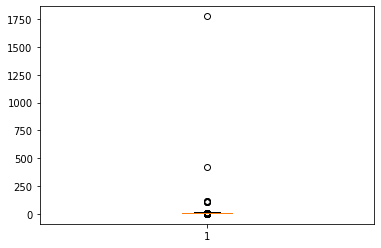

In [57]:
plt.boxplot(x=master_df['rate']);

In [58]:
upper_outliers = master_df[master_df.rate >40].index.tolist()
master_df.drop(upper_outliers,axis = 0, inplace=True)

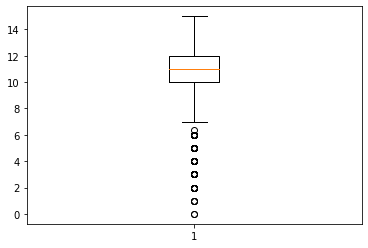

In [59]:
#check outliers
plt.boxplot(x=master_df['rate']);

I will keep the data lower than the bottom of the bloxplot, because in general it is more real data than the upper limit that was given regarding the tweet author's pranks.

#### Test

In [60]:
assert not(master_df.rate >40).any()

In [61]:
master_df.head(3)

tweet_id           timestamp            source  \
0  892420643555336193 2017-08-01 16:23:56  twitterforiphone   
1  892177421306343426 2017-08-01 00:17:27  twitterforiphone   
2  891815181378084864 2017-07-31 00:18:03  twitterforiphone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   

   rating_numerator  rating_denominator     name  favorite_count  \
0              13.0                10.0  Phineas           34915   
1              13.0                10.0    Tilly           30236   
2              12.0                10.0   Archie           22760   

   retweet_count                                          jpg_url   p1_conf  \
0           7326  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg  0.097049   
1           5470  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  0.323581   
2           3619  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg  0.716012   

  dog_stage  dog_breed  rate  
0                  NaN  13.0  
1            Chihuahua  13.0  
2            Chihuahua  12.0

-------------------
<a id='analysis'></a>
## Storing and Acting on Wrangled Data
After the last verification of the data we are ready to follow with the analysis and visualization of the data. First we will save the information in a master dataframe.

-------------------
<a id='analysis'></a>
## Storing
After the entire process of cleaning up and organizing the data, we will save it to a file that can be discussed further.

In [62]:
master_df.to_csv('tweet_dataset_master.csv',encoding='utf-8', index = False)

-------------------
<a id='analysis'></a>
## Visualization and Analysis
Here we will bring some issues that will be addressed through organized data.

## Questions:
    1. Do the Favorite and Retweet Count columns appear to have any kind of correlation?
    2. How does the distribution of tweets during the reporting period vary?
    3. Which stage of the dog's life is the most favorite and retweeted?
    4. What is the average score of each dog breed?
    5. What names were most assigned to the dogs?

Next we will discuss each of them and view the results

------------------

#### 1. Do the Favorite and Retweet Count columns appear to have any kind of correlation?

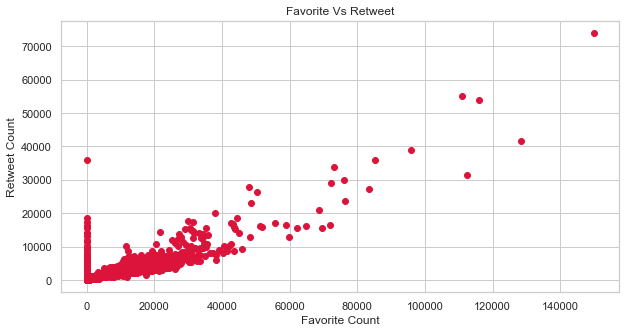

In [80]:
sns.set_theme()
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.scatter(master_df.favorite_count,master_df.retweet_count,color='crimson');
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Favorite Vs Retweet');

In [64]:
master_df['intercept'] = 1
lm = sm.OLS(master_df.favorite_count,master_df[['retweet_count','intercept']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     5865.
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:19:26   Log-Likelihood:                -20718.
No. Observations:                2050   AIC:                         4.144e+04
Df Residuals:                    2048   BIC:                         4.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
retweet_count     2.3257      0.030     76.583      0.000       2.266       2.385
intercept      1968.4819    150.939     13.042      0.000    1672.473    2264.491
==============================================================================
Omnibus:                     1202.565   Durbin-Watson:                   1.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87664.380
Skew:                          -1.940   Prob(JB):                         0.00
Kurtosis:                      34.800   Cond. No.                     5.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can observe with these results that there is rather a strong correlation between the data of Favorite Count and Retweet Count, we obtained a correlation coefficient of +2.32 between the variables and therefore we have a significant statistical result. Note that there are several values that have high retweet count numbers but were 0 in the favorite value. This may have happened by data capture error during JSON extraction and eventually generated an increase in the method error. Another evidence of correlation is the value of R-Square being 0.741, the closer to 1 the more correlated the data.

With this we can say that based on a significant statistical result the retweet and likes data are positively correlated, that is, the higher the number of likes the higher the tweet propagation rate through new posts from followers.

####  2. How does the distribution of tweets during the reporting period vary?

In [65]:
dayweek = pd.value_counts(pd.DatetimeIndex(master_df['timestamp']).dayofweek)
month = pd.value_counts(pd.DatetimeIndex(master_df['timestamp']).month).sort_index()
hour = pd.value_counts(pd.DatetimeIndex(master_df['timestamp']).hour)

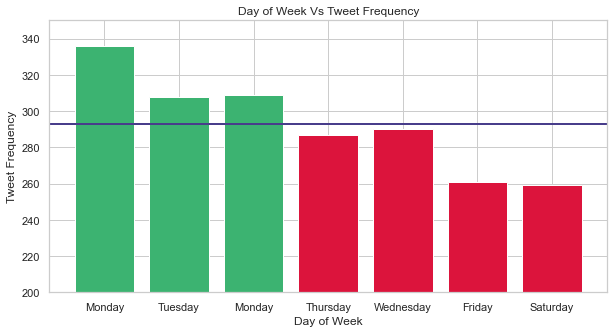

In [66]:
name_days_week = ['Monday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
mask_day_highmean = (dayweek>np.mean(dayweek))
plt.figure(figsize=(10,5))
plt.bar(dayweek.index,dayweek,color='crimson')
plt.bar(dayweek[mask_day_highmean].index,dayweek[mask_day_highmean],color='mediumseagreen')
plt.ylim((200, 350))
plt.axhline(np.mean(dayweek),color='darkslateblue',lw=2)
plt.xticks(dayweek.index,name_days_week)
plt.xlabel('Day of Week')
plt.ylabel('Tweet Frequency')
plt.title('Day of Week Vs Tweet Frequency');

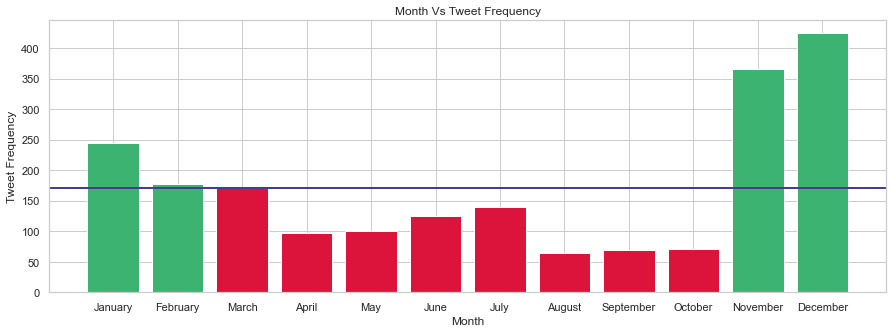

In [67]:
mask_month_higmean = (month>np.mean(month))
label_months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(15,5))
plt.bar(month.index,month,color='crimson')
plt.bar(month[mask_month_higmean].index,month[mask_month_higmean],color='mediumseagreen')
#plt.ylim((200, 350))
plt.axhline(np.mean(month),color='darkslateblue',lw=2)
plt.xticks(month.index,label_months)
plt.xlabel('Month')
plt.ylabel('Tweet Frequency')
plt.title('Month Vs Tweet Frequency');

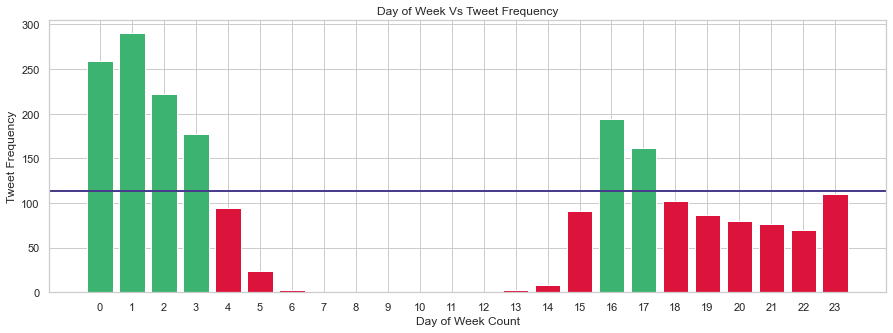

In [68]:
mask_hour_highmean = (hour>np.mean(hour))
plt.figure(figsize=(15,5))
plt.bar(hour.index,hour,color='crimson')
plt.bar(hour[mask_hour_highmean].index,hour[mask_hour_highmean],color='mediumseagreen')
#plt.ylim((200, 350))
plt.axhline(np.mean(hour),color='darkslateblue',lw=2)
plt.xticks(np.arange(0,24,step=1))
plt.xlabel('Day of Week Count')
plt.ylabel('Tweet Frequency')
plt.title('Day of Week Vs Tweet Frequency');

Based on the results above, we observed that the person responsible for the evaluation of dogs has a higher activity of publications during the first days of the week, from Monday to Wednesday. 

In addition his posts, on average, usually to be in the late afternoon between 04pm and 06pm and also in the early hours of the morning between 12am until 4am. The preferred times for posts at these intervals are 04pm and 01 am, respectively. it is important to note that there were very little or no posting in the period between 06am until 2pm.

As for the months, it is noted that there is a big difference between Nov. until Feb. compared to the rest of the months that are all below the posting average. The months that have the highest number of posts fired are Nov. and Dec. this may be due to the fact that in these times there are many festive dates and because it is a period that moves more social networks.

#### 3. Which stage of the dog's life is the most favorite and retweeted?

In [69]:
dog_stage_summary = master_df[master_df['dog_stage'] != ''][['dog_stage','favorite_count','retweet_count']].groupby('dog_stage').mean()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=dog_stage_summary.favorite_count,
      theta=dog_stage_summary.index,
      fill='toself',fillcolor='lightblue',line=dict(color="#11A1FF"),
      name='Average Likes'
))
fig.add_trace(go.Scatterpolar(
      r=dog_stage_summary.retweet_count,
      theta=dog_stage_summary.index,
      fill='toself',
      name='Average Retweeted'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      #range=[0, 5]
    )),
  showlegend=True
)
plotly.offline.init_notebook_mode(connected=True)
fig.show()

Through the radar graph, we observed the behavior of like averages and retweets in relation to each of the evaluated dog categories. It is observed that dogs simultaneously defined as 'doggo,puppo' are shootmore retweeted and marked with liked, with the values of 43k and 16k respectively. It is also observed that there is a lower tendency of retweets in the categories pupper and 'doggo,floofer', but in terms of likes the category of caes 'doggo,floofer' ends up attracting much more likes than the pupper category.

Through these results we also observed that among the categories of isolated caes the 'puppo' is the capture more evaluations than the rest, around 20,000 likes.

#### 4 What is the average rate score of each dog?

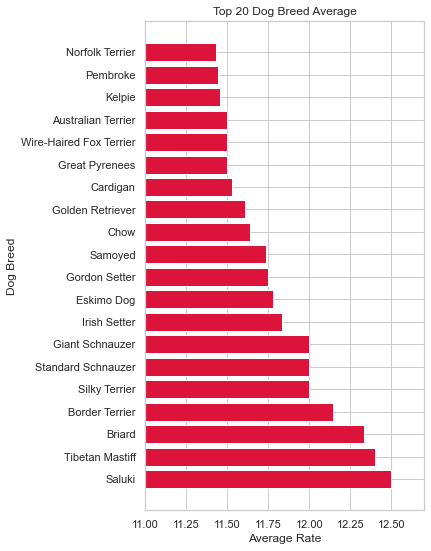

In [70]:
#Get Only 20 higher averages
breed_ravg = master_df[['dog_breed','rate']].groupby('dog_breed').mean().rate.sort_values(ascending=False)[0:20]

plt.figure(figsize=(5,9))
plt.xlim(11,12.7)
plt.barh(breed_ravg.index,breed_ravg,color='crimson');
plt.ylabel('Dog Breed')
plt.xlabel('Average Rate')
plt.title('Top 20 Dog Breed Average');

According to the chart obtained we can say that among the 20 best rated dog breeds, by the tweeter WeRateDogs the Saluki breed has the highest average rating with 12.5 e em segundo temos o Tibetan Mastiff com rate de 12.40

#### 4 What names were most assigned to the dogs?

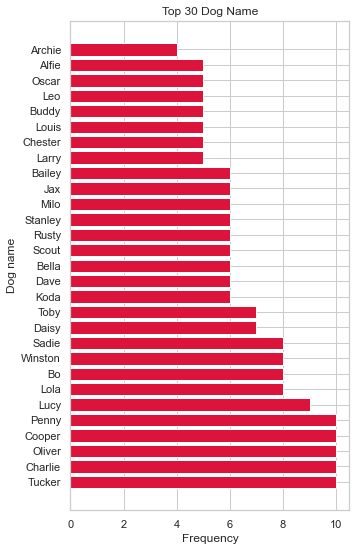

In [71]:
#Get Only 20 higher averages
names_count = master_df[master_df['name'] != None].name.value_counts()[1:30]

plt.figure(figsize=(5,9))
plt.barh(names_count.index,names_count,color='crimson');
plt.ylabel('Dog name')
plt.xlabel('Frequency')
plt.title('Top 30 Dog Name');

We can observe that the most commonly used names among dog owners are: Penny, Cooper, Oliver and Tucker. In research done on the Internet by the most common names, we can observe that most of the names plotted on the chart are in the most popular lists of search sites, in order to exemplify was obtained the list of the site: https://www.rover.com/blog/dog-names/ for comparative purposes.

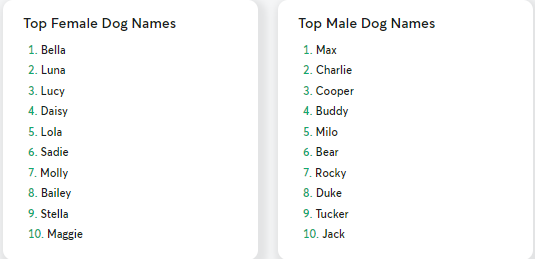

<a id='conclusion'></a>
## Conclusion

In this work we went through all the stages of capturing, organizing/cleaning the data and finally we did an analysis under the final product of the data we built. We learn how to use data capture through a twitter API, and then you can learn a new way to extract information that can further elevate statistical data analysis. We can notice the importance of the data cleansing step by evaluating each item in a detailed process at each step. Finally, this project allowed us to evaluate the main trends of twitter posting analyzed regarding their frequency of publications over time and also observed the performance of the evaluated dogs and how was the reaction of the target audience. Through statistical models we can say with statistical significance that the amount of likes and the amount of retweets are strongly correlated by applying the linear regression model.

In [79]:
master_df.shape

(2050, 15)

<a id='refs'></a>
## References

https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html

https://www.datasciencecentral.com/profiles/blogs/dirty-data-quality-assessment-amp-cleaning-measures

https://stackoverflow.com/questions/44373807/python-panda-join-dynamic-columns-by-removing-duplicates

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html